![Banner](img/banner.png)

# **Actividad N°3:** Analisis de componentes principales (PCA) 

***Matemáticas para Machine Learning.***

Semana 2 - Lección 3: Descomposición en valores singulares.

**Profesor:** *Fernando Enrique Lozano Martinez* - **Autor Notebook:** *Nicolas Orlando López Cuéllar*

# Introducción

## Descripción

El presente *jupyter notebook* contiene todo el material para el desarrollo de la Actividad 3 de la Semana 2 del curso ***Matemáticas para Machine Learning***. En este se construira un algoritmo de reducción de dimensionalidad a partir del análisis de componentes principales o PCA (por su nombre en ingles *Principal Component Analysis*), y se observará un caso de estudio en donde podremos utilizarlo.

**Objetivos de Aprendizaje:**

*   Implementar PCA y aplicarlo sobre una base de datos para visualización.
*   Interpretar los componentes de la descomposición en valores singulares de una matriz.
*   Interpretar geométricamente la estructura espectral de una matriz positiva (semi) definida.

## Metodologia


Para desarrollar esta actividad usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará ayudas del trabajo a realizar, así como algunas de las variables que debe utilizar o calcular. Adiionalmente, Cada punto tendrá una sección para probar el trabajo realizado explorando sus resultados, asi como también una sección de pruebas. La sección de pruebas será calificada, se calificará la entrega final del laboratorio.

# Teoria


**Motivación PCA**

PCA, como su nombre lo indica, se concentra en analizar los componentes principales de un grupo de datos. Esto básicamente consiste en reducir la dimensión en la que se describen los datos, manteniendo la información subyacente relevante que los relaciona. Esto es importante por varios motivos:

Suponga que se tienen una base de datos con algún número $n$ de datos, cada uno con 2. Si nos preguntamos por la visualización de estos datos como puntos en el plano cartesiano, entonces su interpretación es fácil de tener. Si por el contrario tenemos mas de 3 variables en cada dato, se bastante complicado de visualizar y consiguientemente de interpretar. Lograr reducir la dimensión en la que se describen los datos nos permite entonces visualizarlos.

Adicionalmente, a la hora de analizar datos existe un conjunto de fenómenos agrupados en el término [*Curse of Dimensionalyty*](https://en.wikipedia.org/wiki/Curse_of_dimensionality/) acuñado por Richard E. Bellman. Dentro de estos se agrupan muchos inconvenientes que suceden en altas dimensiones pero y no en bajas dimensiones. Esto junto con otras ventajas técnicas, como que el número de calculos para entrenar un algoritmo se reduce, aumentando la velocidad de entramiento; o que se reduce el ruido, al quedarnos con la información más relevante, nos motiva a utilizar PCA en la fase de pre-procesamiento de datos. A continuación se presenta el pseudo código para la implementación del algorimto de análisis de componentes principales.

**Algoritmo PCA**

1.   Se resta la media de cada variable sobre todos los datos

2.   Se calcula la matriz de covarianza

3.   Calcular Valores y Vectores Propios de matriz de covarianza.

4.   Organizar valores propios en orden de magnitud.

5.   Seleccionar subconjunto de vectores propios relacionados a los valores propios con mayor valor de magnitud.

6.   Transformar datos originales en subespacio formado por vectores propios



# Problemas

A continuación se presentan un par de problemas que nos llevarán a implementar analisis de componentes principales o PCA sobré una base de datos. Primero, importamos las librerias necesarias para el laboratorio.

In [1]:
# Librerias Básicas
import numpy as np      
import pandas as pd

# Dibujar
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns


# Visualización
import sys
from IPython.display import display, HTML
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# UTILIDADES =================================
# Correr una única vez por sesión ============
from maiautils import MaiaUtils
ipython = get_ipython()
mutils = MaiaUtils(ipython) 
# ============================================

In [3]:
# Cambiar configuración de informe de errores
mutils.toggle_traceback()

## Proyección

Suponga que tiene una familia de vectores $X = \{ x_1 , \ldots , x_k \} $ en $\mathbb{R}^n$ y una base ortogonal $V = \{v_1 , \ldots v_n \}$, es decir que los vectores en $V$ son linealmene independientes. Encuentre la representación de los vectores en $X$ proyectados en el espacio generado por $V$. Para su representación utilice la base $V$ como sus coordenadas.

In [8]:
def proyeccion(X, V):
    """
    Proyecta los datos en un a * x = 1
    ___________________________________
    Entrada:
    X: [2D-array] Lista de datos en R^n
    V: [2D-array] lista de vectores generadores (lin. ind.) en R^n    
    ___________________________________
    Salida:
    Xp: [2D-array] Lista de vectores en R^n proyectados en espacio generado por 
                   los vectores en V
    """
    X, V = np.array(X), np.array(V)
    Xp = np.dot(V.T, X.T).T
    # =====================================================
    # --------------------------------------------------------------------------
    return Xp

### Prueba

In [9]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_proyeccion(proyeccion)

__________________________________
Verificando errores...




Sin Errores
__________________________________


## PCA

Complete el algoritmo de PCA. Tenga en cuenta que los vectores propios de una matriz simétrica real son ortogonales.

In [15]:
def PCA(X , ncomp):
    """
    Realiza PCA sobre un conjunto de datos
    ___________________________________
    Entrada:
    X: [2D-array] Matriz de dimensión m x n con 
                      m: número de datos  
                      n: número de descriptores
    n_comp: [int] número de componentes a utilizar
    ___________________________________
    Salida:
    X_PCA: [2D-array]  Matriz reducida de dimensión m x n_comp 
    """
    # =====================================================
    # COMPLETAR ===========================================
    # ---------------------- 1 ----------------------
    # 1.   Se resta la media de cada variable sobre todos los datos
    X_meaned = X - np.mean(X, axis=0)

    # ---------------------- 2 ----------------------
    # 2.   Se calcula la matriz de covarianza
    cov_mat = np.cov(X_meaned, rowvar=False)

    # ---------------------- 3 ----------------------
    # 3.   Calcular Valores y Vectores Propios de matriz de covarianza.
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # ---------------------- 4 ----------------------
    # 4.   Organizar valores propios en orden de magnitud.
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # ---------------------- 5 ----------------------
    # 5.   Seleccionar subconjunto de vectores propios relacionados a los valores propios con mayor valor de magnitud.
    eigenvector_subset = sorted_eigenvectors[:, 0:ncomp]

    # ---------------------- 6 ----------------------
    # 6.   Transformar/Proyctar datos originales en subespacio formado por vectores propios 
    X_PCA = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
    X_PCA = proyeccion(X_meaned, eigenvector_subset)
    # =====================================================
    
    return X_PCA

### Prueba

In [16]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

mutils.correr_prueba_PCA(PCA)

__________________________________
Verificando errores...




Sin Errores
__________________________________


## Muestra de Flores

A continuación se presenta la [base de datos de iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset), la cual se utiliza de manera estándar para probar algoritmos de clasificación. Esta base de datos consiste en 150 instancias, cada una con 4 propiedades númericas y una propiedad cualitativa. La idea es aplicar el agoritmo de PCA sobre estos datos para poder visualizarlos en 3 o 2 dimensiones.

In [17]:
# Base de datos IRIS
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data[:5]

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Seleccione y separe los datos de la variable objetivo, luego aplique su implementación de PCA para extraer ncomp componentes. Genere una nueva base de datos con la información obtenida.

In [28]:
def implementar_PCA(data, ncomp=2):
    """ 
    Implenta PCA sobre la bsae de datos introducida para poder visualizar los datos
    ___________________________________
    Entrada:
    data: [pd.DataFrame] Base de datos a utilizar
    n_comp: [int] número de componentes a utilizar
    ___________________________________
    Salida:
    df: [pd.DataFrame] Base de datos con coordenadas reducidas
    
    """
    # =====================================================
    # COMPLETAR ===========================================
    # Seleccione datos y objetivo
    X = data.iloc[:, :4]
    Y = data.iloc[:, 4]
    X_PCA = PCA(X, ncomp)
    columns = [f"x{i+1}" for i in range(ncomp)]
    df0 = pd.DataFrame(X_PCA, columns=columns)
    df = pd.concat([df0, pd.DataFrame(Y)], axis=1)
    # =====================================================

    return df

In [29]:
# PROBAR ==========================================================
df = implementar_PCA(data, ncomp=2)
df

,x1,x2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


### Graficar

Con esta nueva información podemos gráficar ya sea en 1 o en 2 coordenadas

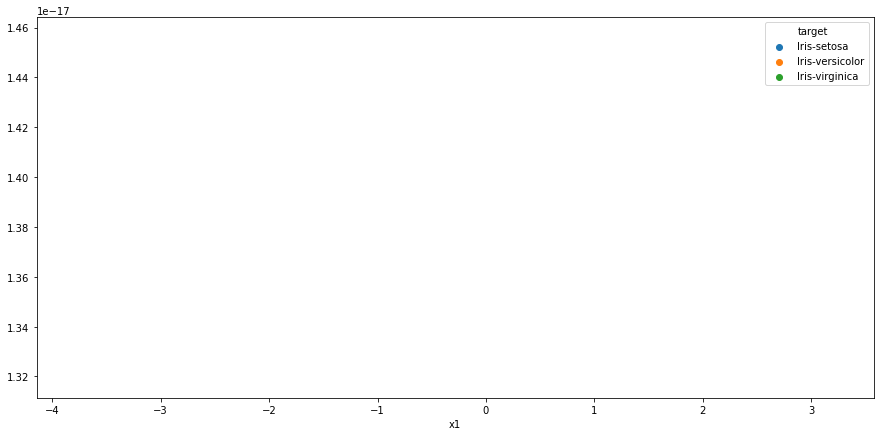

In [33]:
# Dibujar Primer coordenada
plt.figure(figsize=(15, 7))
ax = sns.scatterplot(df['x1'], [0] * len(df), hue=df['target'], s=200)

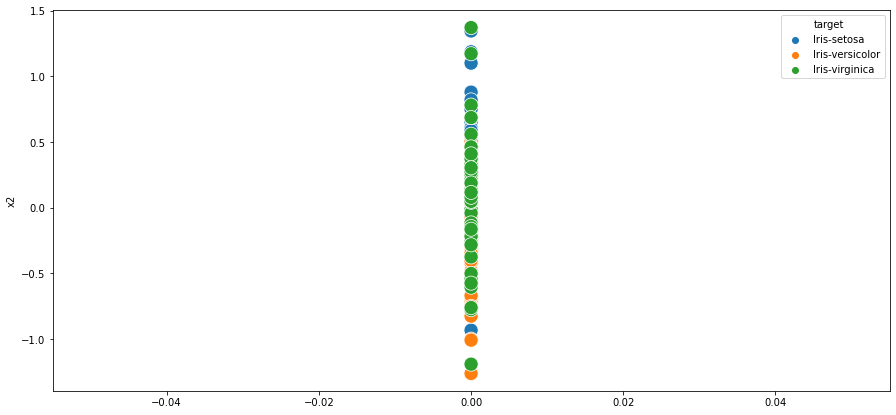

In [34]:
# Dibujar Segunda coordenada
plt.figure(figsize=(15, 7))
ax = sns.scatterplot([0] * len(df), df['x2'], hue=df['target'], s=200)

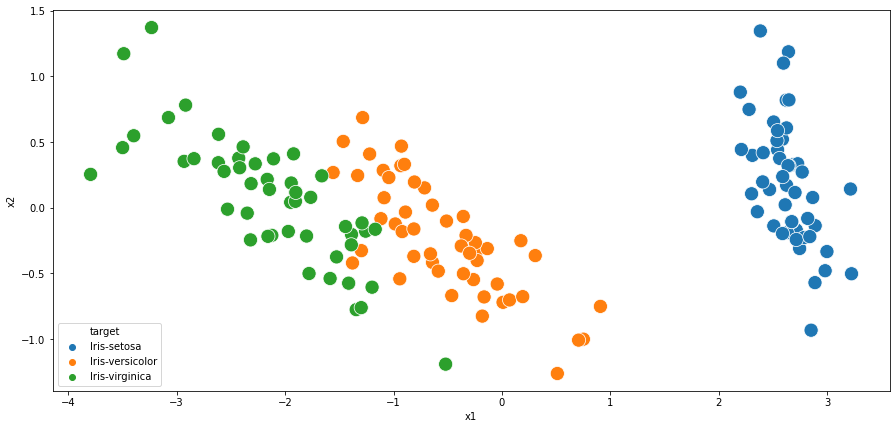

In [35]:
# Dibujar coordenadas
plt.figure(figsize=(15, 7))
ax = sns.scatterplot(df['x1'], df['x2'], hue=df['target'], s=200)

### Prueba

In [36]:
# ============================================================
# PRUEBAS AVANZADAS ==========================================
# ============================================================

# Base de datos IRIS
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

ncomp = 2
mutils.correr_prueba_implementar_PCA(implementar_PCA, [data, ncomp])


__________________________________
Verificando errores...


Se obtuvo



,x1,x2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


__________________________________


Se espera



,x1,x2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa
...,...,...,...
145,-1.944017,0.187415,Iris-virginica
146,-1.525664,-0.375021,Iris-virginica
147,-1.764046,0.078519,Iris-virginica
148,-1.901629,0.115877,Iris-virginica


AssertionError: 